# **Fashion MNIST Neural Network From Scratch**
---

In [ ]:
import numpy as np
from sklearn.datasets import fetch_openml

In [ ]:
data = fetch_openml('Fashion-MNIST',version=1, cache=True, as_frame=False)

In [ ]:
X, Y = data['data'], data['target']

# Splitting dataset
1. `X_train` : Variables used to train the model.
2. `X_test` : Independent variables that will be used to test the model
3. `y_train` : Dependent counterparts of the independent variables in the dataset
4. `y_test` : Labels for test data that will be used for testing and predicting how accurate our model is

In [ ]:
# We will use scikit learn for splitting our data, it is efficient and useful.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2,random_state=42)

# Change the datatype of target data from object to floating point
y_train = y_train.astype(np.float64)
y_test = y_test.astype(np.float64)

In [ ]:
def one_hot_encoding(labels, num_classes = 10):
    #Convert number labels to one hot encoded vectors
    encoded = np.zeros((len(labels), num_classes))
    for i, label in enumerate(labels):
        encoded[i][int(label)] = 1
    return encoded

#Convert all our labels
y_train_encoded = one_hot_encoding(y_train)
y_test_encoded = one_hot_encoding(y_test)

In [ ]:
y_train_encoded.shape

(56000, 10)

# Batch size for training

In [ ]:
# Data that we use can be used in batch
X_train = X_train[:5000]
y_train = y_train_encoded[:5000]

X_test = X_test[:5000]
y_test = y_test_encoded[:5000]

# Normalization of Data
0. T-shirt/top
1. Trouser
2. Pullover
3. Dress
4. Coat
5. Sandal
6. Shirt
7. Sneaker
8. Bag
9. Ankle boot

In [ ]:
all_labels = """T-shirt/top
Trouser
Pullover
Dress
Coat
Sandal
Shirt
Sneaker
Bag
Ankle boot
"""
all_labels = all_labels.split("\n")[:-1]
class_names = {}

for i in range(10):
  class_names[i] = all_labels[i]

class_names

{0: 'T-shirt/top',
 1: 'Trouser',
 2: 'Pullover',
 3: 'Dress',
 4: 'Coat',
 5: 'Sandal',
 6: 'Shirt',
 7: 'Sneaker',
 8: 'Bag',
 9: 'Ankle boot'}

In [ ]:
X_train = X_train/255
X_test = X_test/255

In [ ]:
print(f"The data type of X_train is {type(X_train.dtype)}")
print(f"The data type of y_train is {type(y_train.dtype)}")


The data type of X_train is <class 'numpy.dtypes.Float64DType'>
The data type of y_train is <class 'numpy.dtypes.Float64DType'>


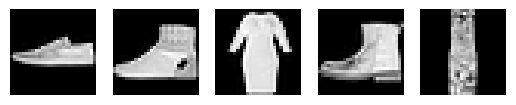

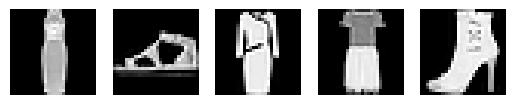

In [ ]:
# Subplot for mnist images
import matplotlib.pyplot as plt

seed = 147197952844
rng = np.random.default_rng(seed)

def create_plot(num_examples):
  fig, axes = plt.subplots(1, num_examples)
  for sample, ax in zip(rng.choice(X_train, size=num_examples, replace=False), axes):
      ax.axis("off")
      ax.imshow(sample.reshape(28, 28), cmap="gray")

# TODO change the implementation to multiple rows and columns
num_examples = 5
create_plot(num_examples)
create_plot(num_examples)

In [ ]:
class NN:
  def __init__(self, inputs, outputs, hidden):
    self.inputs = inputs
    self.outputs = outputs
    self.hidden = hidden

    # Randomized weights

    """
    Input to Hidden layer, for each neuron in hidden layer we have 784 connections(weights)
    """
    self.wih = 0.2 * np.random.randn(self.hidden, self.inputs) - 0.1

    """
    Hidden to Output layer, for each output of the hidden layer,
    we have connections to number of classes in the output layer
    """
    self.who = 0.2 * np.random.randn(self.outputs, self.hidden) - 0.1

    # Biases
    self.bih = 0
    self.bho = 0
    self.learning_rate = 0.05

  def activation(self, z):
      """Returns the sigmoid of z"""
      z = np.clip(z, -500, 500) # Avoid overflow error
      return 1 / (1 + np.exp(-z))

  def activation_derivative(self, z):
      """Returns the derivative of the sigmoid of z"""
      return self.activation(z) * (1 - self.activation(z))

  def forward_propagation(self, inputs):
    # Dot product of the first layer and the weights to hidden layer
    inputs_to_hidden = np.dot(self.wih, inputs.T) + self.bih

    # Generate the output by passing it to an activation function
    hidden_outputs = self.activation(inputs_to_hidden)

    # Dot product of the hidden layer output and the output layer
    hidden_to_output = np.dot(self.who, hidden_outputs) + self.bho


    # Pass it to activate function
    outputs = self.activation(hidden_to_output)

    return outputs

  def backward_propagation(self, inputs, targets):

    targets = np.transpose(targets)
    # Dot product of the first layer and the weights to hidden layer
    inputs_to_hidden = np.dot(self.wih, inputs.T) + self.bih

    # Generate the output by passing it to an activation function
    hidden_outputs = self.activation(inputs_to_hidden)

    # Dot product of the hidden layer output and the output layer
    hidden_to_output = np.dot(self.who, hidden_outputs) + self.bho

    # Pass it to activate function and generate final output
    outputs = self.activation(hidden_to_output)

    # Calculate errors based on the forward prop error
    output_errors = -(targets - outputs)

    # Calculate errors based on hidden and output layer
    print(f"Multiplying {self.who.T.shape} and {output_errors.shape}")
    hidden_errors = np.dot(self.who.T, output_errors)

    # Update the weights
    print(f"Multiplying {hidden_errors.shape} and 1 or 0")
    self.wih -= self.learning_rate * np.dot(
        (hidden_errors * self.activation_derivative(hidden_outputs)),
        inputs
    )

    print(f"Multiplying {output_errors.shape} and 1 or 0")
    self.who -= self.learning_rate * np.dot(
        (output_errors * self.activation_derivative(outputs)),
        np.transpose(hidden_outputs)
    )

    #self.bho -= self.learning_rate * (output_errors * self.activation_derivative(outputs))
    #self.bih -= self.learning_rate * (hidden_errors * self.activation_derivative(hidden_errors))

  def fit(self, inputs, targets, epochs):
      for epoch in range(epochs):
          self.backward_propagation(inputs, targets)
          print(f"Epoch {epoch}/{epochs} completed.")

  def predict(self, X):
    outputs = self.forward_propagation(X).T
    return outputs


In [ ]:
n = NN(784, 10, 128)
n.fit(X_train, y_train, epochs=500)
outputs = n.forward_propagation(X_test)

Multiplying (128, 10) and (10, 5000)
Multiplying (128, 5000) and 1 or 0
Multiplying (10, 5000) and 1 or 0
Epoch 0/500 completed.
Multiplying (128, 10) and (10, 5000)
Multiplying (128, 5000) and 1 or 0
Multiplying (10, 5000) and 1 or 0
Epoch 1/500 completed.
Multiplying (128, 10) and (10, 5000)
Multiplying (128, 5000) and 1 or 0
Multiplying (10, 5000) and 1 or 0
Epoch 2/500 completed.
Multiplying (128, 10) and (10, 5000)
Multiplying (128, 5000) and 1 or 0
Multiplying (10, 5000) and 1 or 0
Epoch 3/500 completed.
Multiplying (128, 10) and (10, 5000)
Multiplying (128, 5000) and 1 or 0
Multiplying (10, 5000) and 1 or 0
Epoch 4/500 completed.
Multiplying (128, 10) and (10, 5000)
Multiplying (128, 5000) and 1 or 0
Multiplying (10, 5000) and 1 or 0
Epoch 5/500 completed.
Multiplying (128, 10) and (10, 5000)
Multiplying (128, 5000) and 1 or 0
Multiplying (10, 5000) and 1 or 0
Epoch 6/500 completed.
Multiplying (128, 10) and (10, 5000)
Multiplying (128, 5000) and 1 or 0
Multiplying (10, 5000) an

In [ ]:
predictions = []

for prob in outputs.T:
    max_idx = np.argmax(prob)
    prediction = np.zeros_like(prob)
    prediction[max_idx] = 1
    predictions.append(prediction)

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report


print("Accuracy:",accuracy_score(predictions, y_test))
print("CR:", classification_report(predictions, y_test))

Accuracy: 0.7244
CR:               precision    recall  f1-score   support

           0       0.89      0.61      0.73       719
           1       0.92      0.96      0.94       477
           2       0.75      0.61      0.67       616
           3       0.75      0.84      0.79       474
           4       0.11      0.84      0.19        63
           5       0.81      0.77      0.79       545
           6       0.50      0.38      0.43       659
           7       0.83      0.82      0.82       490
           8       0.89      0.87      0.88       483
           9       0.80      0.86      0.83       474

   micro avg       0.72      0.72      0.72      5000
   macro avg       0.72      0.76      0.71      5000
weighted avg       0.78      0.72      0.74      5000
 samples avg       0.72      0.72      0.72      5000



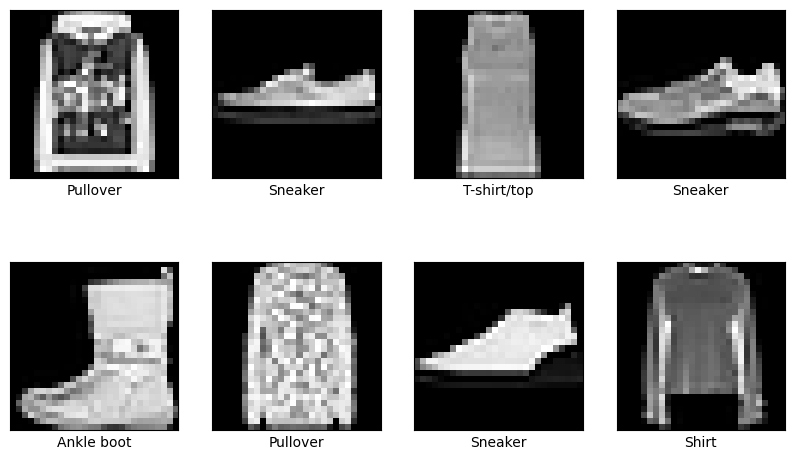

In [ ]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(2, 4, figsize=(10, 6))
for i, ax in enumerate(axes.flat):
    img_data = X_test[i].reshape((28, 28))
    # Display image
    ax.imshow(img_data, cmap='gray')
    ax.set_xticks([])
    ax.set_yticks([])
    index = np.where(predictions[i] == 1)[0][0]
    label = class_names[index]
    true_label = class_names[np.argmax(y_test[i])]
    if label != true_label: # Writing the prediction label as red if it is wrong
        ax.set_xlabel(label, color='r')
    else:
        ax.set_xlabel(label)
plt.show()